In [29]:
#Load Libraries
import os as os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange,uniform

In [30]:
#Set Working Directory
os.chdir("C:/Users/Rishabh/Desktop/Edwisor-new/Project-2")

In [32]:
#Load Data
bike_rent = pd.read_csv("day.csv")

In [33]:
#Exploratory data analysis
categorical_index = [2,3,4,5,6,7,8]
for i in categorical_index:
    bike_rent.iloc[:,i] = bike_rent.iloc[:,i].astype("category")

##Ignore the "casual" and "registered" fields as their sum is equal to the "cnt" field
del bike_rent["casual"]
del bike_rent["registered"]

# Missing Value Analysis

In [34]:
bike_rent.isnull().sum() # As there are no missing values, therefore no need of missing value analysis

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## Outlier Analysis

In [35]:
#Creating a backup
df = bike_rent.copy()

In [36]:
#specific columns on which Outlier analysis needs to be applied.
cnames = ["temp","atemp","hum","windspeed","cnt"]
cnames_index = [10,11,12,13,14]

{'whiskers': [<matplotlib.lines.Line2D at 0xb9afe29ac8>,
 'caps': [<matplotlib.lines.Line2D at 0xb9afe2f3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0xb9afe29978>,
 'medians': [<matplotlib.lines.Line2D at 0xb9afe2fc18>,
 'fliers': [<matplotlib.lines.Line2D at 0xb9afdb8080>,
 'means': []}

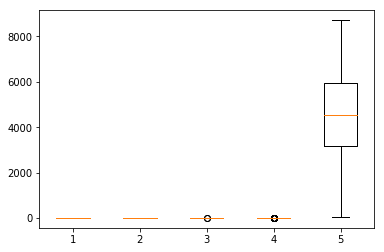

In [37]:
##Plot boxplot to visualize Outliers
%matplotlib inline
plt.boxplot([bike_rent["temp"], bike_rent["atemp"], bike_rent["hum"], bike_rent["windspeed"], bike_rent["cnt"]])

In [38]:
#Detect and delete outliers from data
for i in cnames:
    print(i)
    q75, q25 = np.percentile(bike_rent.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    bike_rent = bike_rent.drop(bike_rent[bike_rent.loc[:,i] < min].index)
    bike_rent = bike_rent.drop(bike_rent[bike_rent.loc[:,i] > max].index)

temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585
cnt
-1011.5
10256.5


### Feature Selection


In [39]:
##Correlation analysis
#Correlation plot
df_corr = bike_rent.loc[:,cnames]

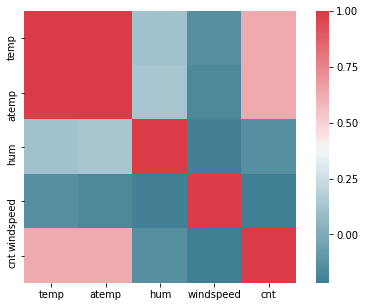

In [40]:
#Set the width and height of the plot
f,ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [41]:
bike_rent = bike_rent.drop("temp",axis =1)
####"instant" , "dteday" and "yr" contribute nothing to the model. They change everyday("yr" changes every year). Thus they are also removed
bike_rent = bike_rent.drop("instant",axis =1)
bike_rent = bike_rent.drop("dteday",axis =1)
bike_rent = bike_rent.drop("yr",axis =1)

#### Storing Pre Processed File

In [42]:
bike_rent.to_csv("pre_processed.csv",index = False)

##### Model Development

# Decision Tree Model

In [43]:
#Decision Tree Regression
#Load Libraries
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [44]:
#Divide the data into train and test
train, test = train_test_split(bike_rent, test_size =0.2)

In [45]:
#Decision tree for regression
fit = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:9], train.iloc[:,9])

In [46]:
#Apply model on test data
predictions_DT = fit.predict(test.iloc[:,0:9])

In [47]:
#Calculating rmse
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(predictions_DT, test.iloc[:,9])


1394.397591274645

In [48]:
#Calculating rmsle
def rmsle(predictions, targets) :
    return np.sqrt(np.mean((np.log(1+predictions) - np.log(1+targets))**2))
rmsle(predictions_DT, test.iloc[:,9])

0.40886173455104324

In [49]:
#rmsle = 0.38

# Linear Regression Model

In [50]:
#Load Libraries
from sklearn import datasets, linear_model


In [51]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [52]:
regr.fit(train.iloc[:,0:9], train.iloc[:,9])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
#Apply model on test data
predictions_LR = regr.predict(test.iloc[:,0:9])

In [54]:
rmse(predictions_LR, test.iloc[:,9])

1267.1325171132494

In [55]:
rmsle(predictions_LR, test.iloc[:,9]) # In case the predictions have negative values, we need to replace them by the min value and then compute rmsle,otherwise it would throw error.

0.3361964862643883

In [56]:
#rmsle = 0.35

In [57]:
#####In case the previous rmsle can't be computed due to negative predictions, use this
Output1 = predictions_LR
Output1[predictions_LR <0] = 22
rmsle(Output1, test.iloc[:,9])

0.3361964862643883